In [81]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [82]:
# Load and preprocess the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [83]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


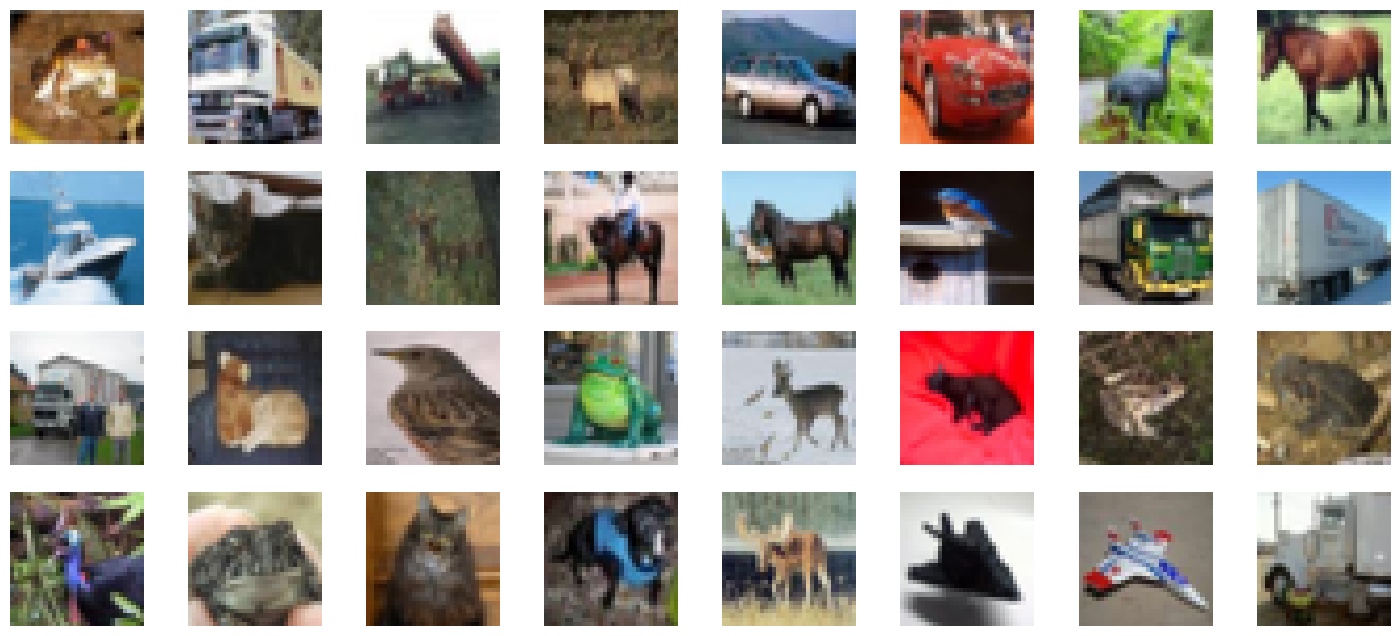

In [84]:
# Sample dataset
plt.figure(figsize=(18, 8))

num_rows = 4
num_cols = 8

# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(x_train[i, :, :])
    plt.axis("off")

In [85]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [86]:
x_train[0].shape

(32, 32, 3)

In [87]:
# Build the model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [88]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
# Train the model
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/100
196/196 [==============================] - 5s 21ms/step - loss: 2.7024 - accuracy: 0.1508 - val_loss: 2.0692 - val_accuracy: 0.1847
Epoch 2/100
196/196 [==============================] - 3s 17ms/step - loss: 2.0409 - accuracy: 0.2013 - val_loss: 1.9872 - val_accuracy: 0.2464
Epoch 3/100
196/196 [==============================] - 3s 16ms/step - loss: 1.9171 - accuracy: 0.2835 - val_loss: 1.8311 - val_accuracy: 0.3393
Epoch 4/100
196/196 [==============================] - 3s 16ms/step - loss: 1.8152 - accuracy: 0.3354 - val_loss: 1.8274 - val_accuracy: 0.3347
Epoch 5/100
196/196 [==============================] - 3s 16ms/step - loss: 1.7776 - accuracy: 0.3549 - val_loss: 1.7476 - val_accuracy: 0.3645
Epoch 6/100
196/196 [==============================] - 3s 16ms/step - loss: 1.7502 - accuracy: 0.3666 - val_loss: 1.7108 - val_accuracy: 0.3832
Epoch 7/100
196/196 [==============================] - 3s 17ms/step - loss: 1.7236 - accuracy: 0.3780 - val_loss: 1.7723 - val_accuracy:

In [90]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 1.6353 - accuracy: 0.4078 - 990ms/epoch - 3ms/step


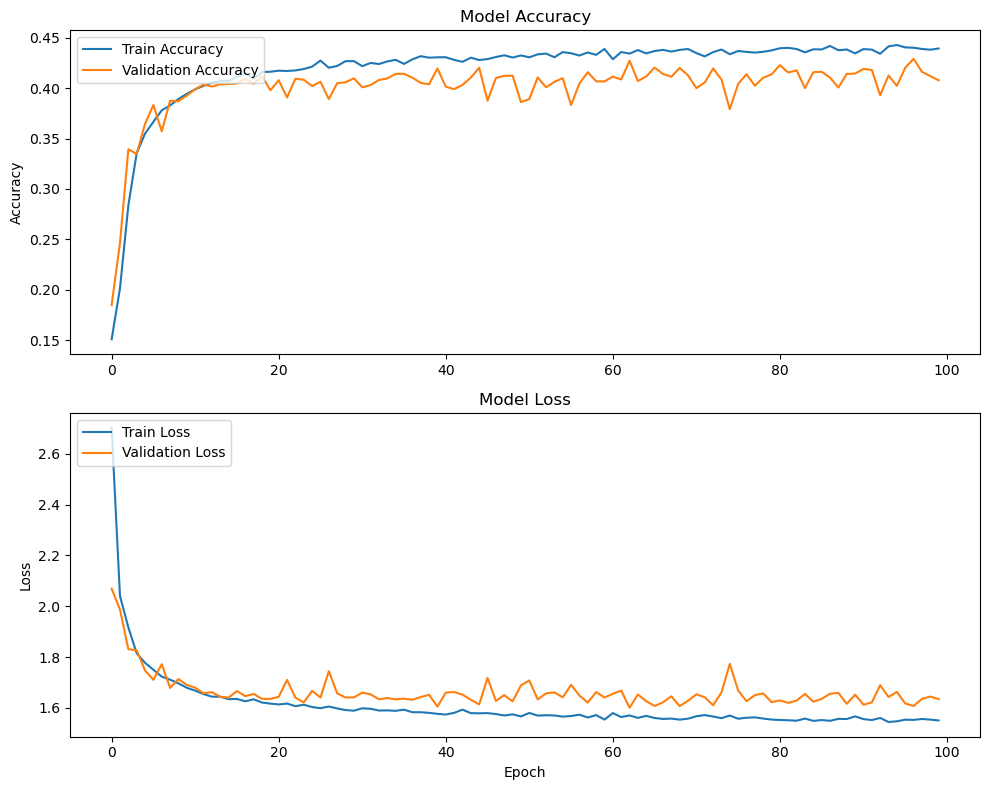

In [91]:
# Visualize the training results
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].legend(loc='upper left')

# Plot training & validation loss values
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_title('Model Loss')
axs[1].legend(loc='upper left')


plt.tight_layout()
plt.show()

In [92]:
# Make predictions
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


313/313 [==============================] - 1s 3ms/step


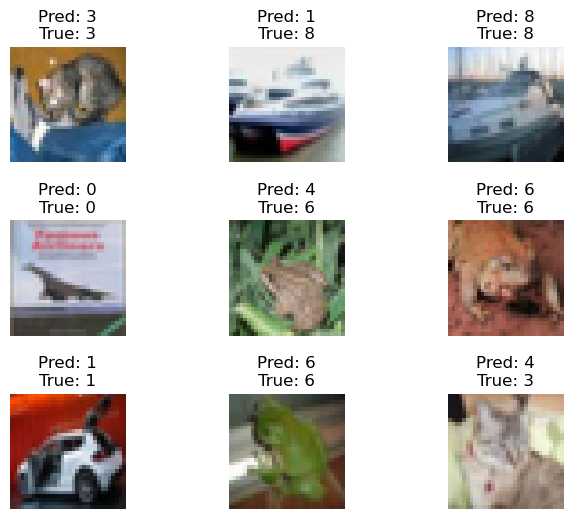

In [101]:
# Plot predicted vs actual results
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Display some of the test images along with predicted and actual labels
fig, axes = plt.subplots(3, 3, figsize=(8, 6))
axes = axes.ravel()

for i in np.arange(0, 9):
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"Pred: {y_pred_classes[i]}\nTrue: {y_true[i]}")
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()

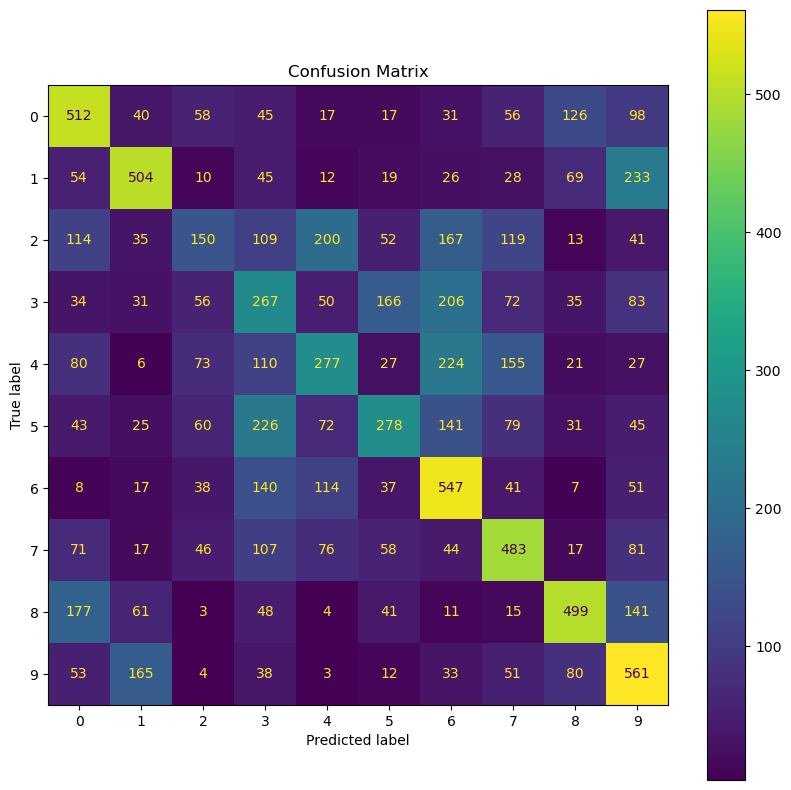

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=np.arange(10))

fig, ax = plt.subplots(figsize=(10, 10))
cmd.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()  